In [1]:
import uproot
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import zfit
import math
import scipy
import matplotlib

from hepstats.hypotests.calculators import AsymptoticCalculator
from hepstats.hypotests.parameters  import POIarray, POI

In [4]:
cols = ['#CCCCCC', '#07A9FF', '#1A2A5B', '#FF9E21', '#149A9A', 'indianred', '#66283A', '#8A1859', '#BFC2C7',
        '#FFB0A8', '#B580CA', '#203769', '#909090', '#909090', '#83C369', '#FDED95', '#85F7C2', '#105D20',
        '#E77D4D', '#9D0008', '#EDDAB7', '#DCDCDC', '#DCDCDC', '#393939']

In [5]:
def find_zero_crossing(x, y):
    """
    Find the zero crossings of the spline interpolated function of y with respect to x.
    """
    tck = scipy.interpolate.splrep(x, y, s=0)
    return scipy.interpolate.sproot(tck)

def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(math.floor(math.log10(abs(num))))
    coeff = round(num / float(10 ** exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"{0:.{2}f}$\cdot$10$^{{{1:d}}}$".format(coeff, exponent, precision)

def set_border_line_width(ax: matplotlib.axes, lineWidth: float) -> None:
    """
    Utility function for getting the frame of an axis and setting the line width
    """
    [axis.set_linewidth(lineWidth) for axis in ax.spines.values()]

## SM 2nbb distribution

In [6]:
sm_2nbb_dist = np.loadtxt('/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/L200_Spectral_Effects_Fitting/dist/standard_model/SM_2vbb_76Ge_sums.txt', usecols=(2), unpack=True)
sm_2nbb_dist = np.insert(sm_2nbb_dist, 0, 0, axis=0)

In [7]:
bins = np.arange(0, len(sm_2nbb_dist), 1)

## Lorentz violation spectrum:

In [8]:
basepath = '/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/spectral_dist/'

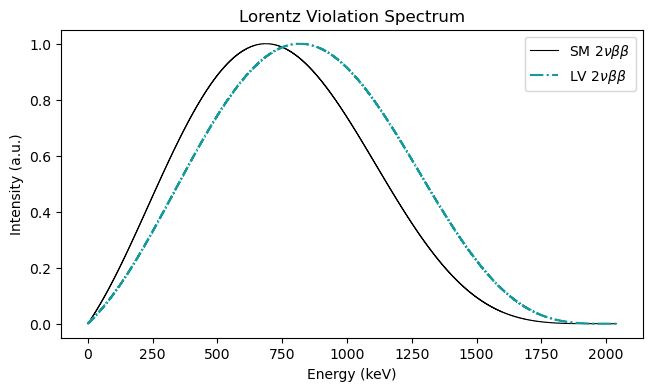

In [9]:
lv_dist = np.loadtxt(basepath + 'dist/lorentz/LV_76Ge_spectra.dat', usecols=(2), unpack=True)
lv_dist = np.insert(lv_dist, 0, 0, axis=0)
lv_dist = lv_dist / np.sum(lv_dist)

fig, ax = plt.subplots(figsize=(7.5, 4))
ax.step(bins, sm_2nbb_dist / np.max(sm_2nbb_dist), c='k',     lw=0.8,  label=r'SM 2$\nu\beta\beta$')
ax.step(bins, lv_dist      / np.max(lv_dist),      c=cols[4], ls='-.', label=r'LV 2$\nu\beta\beta$')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('Lorentz Violation Spectrum')
ax.legend()
plt.show()

# Sensitivity:

### L200 background data

In [10]:
data_path = '/Users/romoluque_c/LEGEND/2nbb_distortions/data_bckg_model/'

bckg_bins, tot_model = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_total_model.txt', usecols=(0,1), unpack=True, skiprows=1, delimiter=',')
alphas_model         = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_alphas.txt',      usecols=(1),   unpack=True, skiprows=1, delimiter=',')
co60_model           = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Co60_chain.txt',  usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k40_model            = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_K40_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k42_model            = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_K42_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
vvBB_model           = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Nvbb.txt',        usecols=(1),   unpack=True, skiprows=1, delimiter=',')
Th_model             = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_Th_chain.txt',    usecols=(1),   unpack=True, skiprows=1, delimiter=',')
U_model              = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_U_chain.txt',     usecols=(1),   unpack=True, skiprows=1, delimiter=',')
L200_actual_data     = np.loadtxt(data_path + 'l200_p03_to_p09_all_det_fitted_data.txt', usecols=(1),   unpack=True, skiprows=1, delimiter=',')

# From Neutrino2024 talk
L200_data_exposure = 76.2 #kg * yr

######## Normalize by exposure
total_model      = tot_model        / L200_data_exposure
alphas_model     = alphas_model     / L200_data_exposure
co60_model       = co60_model       / L200_data_exposure
k40_model        = k40_model        / L200_data_exposure
k42_model        = k42_model        / L200_data_exposure
vvBB_model       = vvBB_model       / L200_data_exposure
Th_model         = Th_model         / L200_data_exposure
U_model          = U_model          / L200_data_exposure
L200_actual_data = L200_actual_data / L200_data_exposure

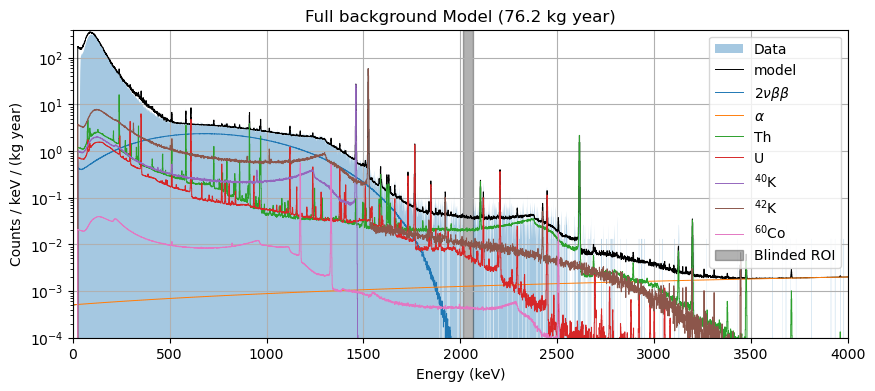

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.fill_between(bckg_bins, 0, L200_actual_data, label=r'Data', alpha=0.4)
#ax.step(bckg_bins, L200_actual_data, label=r'Data', alpha=0.3)
ax.step(bckg_bins, total_model,  where='post', lw=0.7, label='model', color='black')
ax.step(bckg_bins, vvBB_model,   where='post', lw=0.7, label=r'$2\nu\beta\beta$')
ax.step(bckg_bins, alphas_model, where='post', lw=0.7, label=r'$\alpha$')
ax.step(bckg_bins, Th_model,     where='post', lw=0.7, label=r'Th')
ax.step(bckg_bins, U_model,      where='post', lw=0.7, label=r'U')
ax.step(bckg_bins, k40_model,    where='post', lw=0.7, label=r'$^{40}$K')
ax.step(bckg_bins, k42_model,    where='post', lw=0.7, label=r'$^{42}$K')
ax.step(bckg_bins, co60_model,   where='post', lw=0.7, label=r'$^{60}$Co')

# Shade blinded ROI
qbb      = 2039 # keV
roi_ampl =   50 # keV
ax.axvspan(qbb - roi_ampl/2, qbb + roi_ampl/2, label=r'Blinded ROI', alpha=0.3, color='black')
ax.legend(loc='upper right')
ax.set_yscale('log')
ax.set_title(f'Full background Model ({L200_data_exposure} kg year)')
ax.set_ylabel('Counts / keV / (kg year)')
ax.set_xlabel('Energy (keV)')
ax.set_ylim(1e-4, 4e2)
ax.set_xlim(0, 4000)
ax.grid()
plt.show()

## Spectrum subtracting 2nbb:

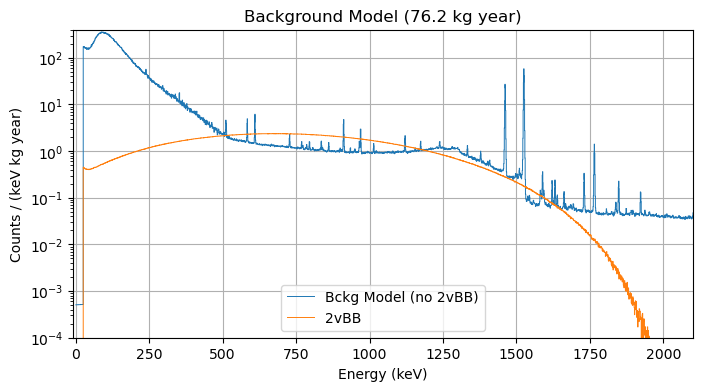

In [12]:
bckg_model = (total_model - vvBB_model)

fig, ax = plt.subplots(figsize=(8, 4))
ax.step(bckg_bins, bckg_model, where='post', lw=0.7, label='Bckg Model (no 2vBB)')
ax.step(bckg_bins, vvBB_model, where='post', lw=0.7, label='2vBB')
ax.set_yscale('log')
ax.set_ylim(1e-4, 4e2)
ax.set_title(f'Background Model ({L200_data_exposure} kg year)')
ax.set_ylabel("Counts / (keV kg year)")
ax.set_xlabel('Energy (keV)')
ax.set_xlim(-10, 2100)
ax.grid()
ax.legend()
plt.show()

## Lorentz violation

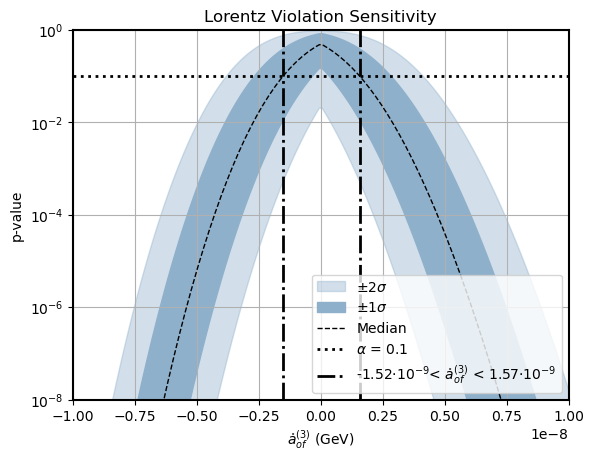

In [15]:
# Read in spectra
lv_dist             = np.loadtxt(basepath + 'dist/lorentz/LV_76Ge_spectra.dat', usecols=(2), unpack=True)
lv_dist             = np.insert(lv_dist, 0, 0, axis=0)
lv_dist_phasesp_int = np.sum(lv_dist) * 402.701 # Data file tells us to multiply by 402.701 to get G in units of 10^-21 y^-1 MeV^-1.
lv_dist             = lv_dist / np.sum(lv_dist) # Normalize to area = 1

# Significance Level
alpha = 0.1

exposure = L200_data_exposure

min_bin = 30
max_bin = 2010

# Range of values to construct CI over
LV_ratio_min = -0.1
LV_ratio_max =  0.1

# ===========================================================================

# Cut the distribution in the fit range
limits              = (min_bin, max_bin + 1)
binning             = max_bin + 1 - min_bin
bckg_model_fitrange = bckg_model[min_bin:max_bin + 1]
vvBB_model_fitrange = vvBB_model[min_bin:max_bin + 1]
lv_dist_fitrange    = lv_dist   [min_bin:max_bin + 1]

# Calculate the number of background and 2vBB events
Nbckg = exposure * np.sum(bckg_model_fitrange)
NvvBB = exposure * np.sum(vvBB_model_fitrange)

# Setup zfit values
obs    = zfit.Space('E', limits=limits, binning=binning)
n_vvBB = zfit.Parameter('n_2vBB', NvvBB, 0, step_size=0.01)
n_bckg = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)

def product(a, b):
    return a * b

LV_ratio = zfit.Parameter('LV_ratio', 0, lower = 1.5 * LV_ratio_min, upper = 1.5 * LV_ratio_max, step_size=0.01)
n_LV     = zfit.ComposedParameter('n_LV', product, params=[LV_ratio, n_vvBB])

vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)
lv_pdf         = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=lv_dist_fitrange), extended=n_LV)
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)

model = zfit.pdf.BinnedSumPDF([lv_pdf, vvBB_pdf, bckg_model_pdf])

# 0 means "no perturbation"
LV_ratio.set_value(0)
n_vvBB  .set_value(NvvBB)
n_bckg  .set_value(Nbckg)

real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

# In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
# After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
# I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
# zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
# In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
# as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
# nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
minimizer = zfit.minimize.Minuit(verbosity=0)

# Perturb n_signal away from 0 to get out of a local minimum at 0
# Even when n_signal for the fake_data != 0 the fitting gets stuck there for some reason
# This only happens sometimes, and more often when I don't bound n_signal, n_background > 0
LV_ratio.set_value(LV_ratio_min/10)
n_vvBB  .set_value(NvvBB)
n_bckg  .set_value(Nbckg)

result = minimizer.minimize(nll)
result.hesse(name = 'hesse_np')

calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

# https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
LV_ratio_hypot_vals = np.linspace(LV_ratio_min, LV_ratio_max, 200)
poialt  = POI(LV_ratio, 0) # Background only
poinull = POIarray(LV_ratio, LV_ratio_hypot_vals) # Background + signal

# oneSided=True gives correct p-values from hepstats
# onesidedDiscovery will work when poialt > poinull
# onesided will work when poinull > poialt
# Get both results and combine into full p-value plot
expectedLeft  = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=True, onesideddiscovery=True)
expectedRight = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=True, onesideddiscovery=False)

# Where default (incorrect) output is given, use the correct results expected p-value array
expected = np.where(expectedLeft[0] == 5e-1, expectedRight, expectedLeft)

# Data file tells us to multiply by 48.122 to get G in units of 10^-21 y^-1.
nnbb_ref_phasesp_int = np.sum(lv_dist) * 48.122 
# Calculate phase space ratio and convert to units of GeV
full_spec_phasesp_ratio_MeV = nnbb_ref_phasesp_int / lv_dist_phasesp_int
full_spec_phasesp_ratio_GeV = full_spec_phasesp_ratio_MeV * 1e-3

aof = LV_ratio_hypot_vals * full_spec_phasesp_ratio_GeV
# Calculate sensitivity
aof_sens       = find_zero_crossing(aof, expected[0] - alpha)
aof_sens_left  = aof_sens[0]
aof_sens_right = aof_sens[1]

sens_label = sci_notation(aof_sens_left, precision=2, decimal_digits=2) + r'< $\mathring{a}_{of}^{(3)}$ < ' + sci_notation(aof_sens_right, precision=2, decimal_digits=2)

fig, ax = plt.subplots()
ax.fill_between(aof, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
ax.fill_between(aof, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
ax.plot(aof, expected[0], c='black', lw=1, ls='dashed', label='Median')
ax.axhline(alpha,          lw=2, ls='dotted',  color='black', label=r'$\alpha$ = ' + str(alpha))
ax.axvline(aof_sens_left,  lw=2, ls='dashdot', color='black', label=sens_label)
ax.axvline(aof_sens_right, lw=2, ls='dashdot', color='black')
set_border_line_width(ax, 1.5)
ax.set_title('Lorentz Violation Sensitivity')
ax.set_xlabel(r'$\mathring{a}_{of}^{(3)}$ (GeV)')
ax.set_ylabel('p-value')
#ax.set_xlim(min(aof), max(aof))
ax.set_xlim(-1e-8, 1e-8)
ax.set_ylim(1e-8, 1)
ax.set_yscale('log')
ax.legend(loc='lower right')
ax.grid()
#fig.savefig('./images/lorentz_violation_aof.pdf', bbox_inches='tight')
plt.show()

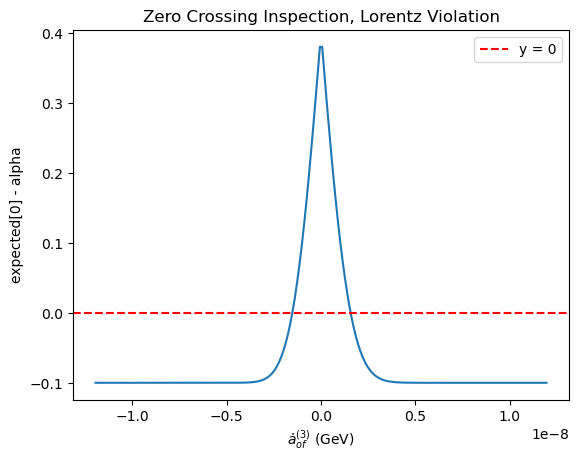

In [14]:
plt.plot(aof, expected[0] - alpha)
plt.axhline(0, color='red', linestyle='--', label='y = 0')
plt.xlabel(r'$\mathring{a}_{of}^{(3)}$ (GeV)')
plt.ylabel('expected[0] - alpha')
plt.title(f'Zero Crossing Inspection, Lorentz Violation')
plt.legend()
plt.show()

## Energy range = (500-2010) keV

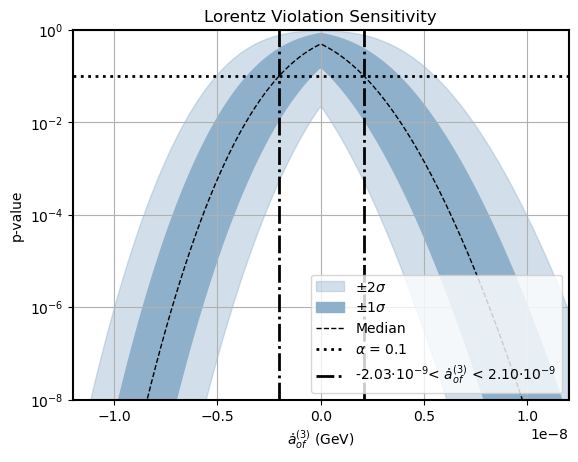

In [20]:
min_bin =  500
max_bin = 2010

# Cut the distribution in the fit range
limits              = (min_bin, max_bin + 1)
binning             = max_bin + 1 - min_bin
bckg_model_fitrange = bckg_model[min_bin:max_bin + 1]
vvBB_model_fitrange = vvBB_model[min_bin:max_bin + 1]
lv_dist_fitrange    = lv_dist   [min_bin:max_bin + 1]

# Calculate the number of background and 2vBB events
Nbckg = exposure * np.sum(bckg_model_fitrange)
NvvBB = exposure * np.sum(vvBB_model_fitrange)

# Setup zfit values
obs    = zfit.Space('E', limits=limits, binning=binning)
n_vvBB = zfit.Parameter('n_2vBB', NvvBB, 0, step_size=0.01)
n_bckg = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)

LV_ratio = zfit.Parameter('LV_ratio', 0, lower = 1.5 * LV_ratio_min, upper = 1.5 * LV_ratio_max, step_size=0.01)
n_LV     = zfit.ComposedParameter('n_LV', product, params=[LV_ratio, n_vvBB])

vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)
lv_pdf         = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=lv_dist_fitrange), extended=n_LV)
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)

model = zfit.pdf.BinnedSumPDF([lv_pdf, vvBB_pdf, bckg_model_pdf])

# 0 means "no perturbation"
LV_ratio.set_value(0)
n_vvBB  .set_value(NvvBB)
n_bckg  .set_value(Nbckg)

real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
minimizer = zfit.minimize.Minuit(verbosity=0)

LV_ratio.set_value(LV_ratio_min/10)
n_vvBB  .set_value(NvvBB)
n_bckg  .set_value(Nbckg)

result = minimizer.minimize(nll)
result.hesse(name = 'hesse_np')

calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

LV_ratio_hypot_vals = np.linspace(LV_ratio_min, LV_ratio_max, 200)
poialt  = POI(LV_ratio, 0) # Background only
poinull = POIarray(LV_ratio, LV_ratio_hypot_vals) # Background + signal

expectedLeft  = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=True, onesideddiscovery=True)
expectedRight = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=True, onesideddiscovery=False)

expected = np.where(expectedLeft[0] == 5e-1, expectedRight, expectedLeft)

nnbb_ref_phasesp_int = np.sum(lv_dist) * 48.122 #
# Calculate phase space ratio and convert to units of GeV
full_spec_phasesp_ratio_MeV = nnbb_ref_phasesp_int / lv_dist_phasesp_int
full_spec_phasesp_ratio_GeV = full_spec_phasesp_ratio_MeV * 1e-3

aof = LV_ratio_hypot_vals * full_spec_phasesp_ratio_GeV
# Calculate sensitivity
aof_sens       = find_zero_crossing(aof, expected[0] - alpha)
aof_sens_left  = aof_sens[0]
aof_sens_right = aof_sens[1]

sens_label = sci_notation(aof_sens_left, precision=2, decimal_digits=2) + r'< $\mathring{a}_{of}^{(3)}$ < ' + sci_notation(aof_sens_right, precision=2, decimal_digits=2)

fig, ax = plt.subplots()
ax.fill_between(aof, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
ax.fill_between(aof, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
ax.plot(aof, expected[0], c='black', lw=1, ls='dashed', label='Median')
ax.axhline(alpha,          lw=2, ls='dotted',  color='black', label=r'$\alpha$ = ' + str(alpha))
ax.axvline(aof_sens_left,  lw=2, ls='dashdot', color='black', label=sens_label)
ax.axvline(aof_sens_right, lw=2, ls='dashdot', color='black')
set_border_line_width(ax, 1.5)
ax.set_title('Lorentz Violation Sensitivity')
ax.set_xlabel(r'$\mathring{a}_{of}^{(3)}$ (GeV)')
ax.set_ylabel('p-value')
#ax.set_xlim(min(aof), max(aof))
ax.set_xlim(-1.2e-8, 1.2e-8)
ax.set_ylim(1e-8, 1)
ax.set_yscale('log')
ax.legend(loc='lower right')
ax.grid()
#fig.savefig('./images/lorentz_violation_aof_min_bin_500keV.pdf', bbox_inches='tight')
plt.show()